This Colab Notebook is a continuation of the **Medication Recommender Project**: https://colab.research.google.com/drive/1Bl0GE_BZPVa0sho-lL2HqWHsCKrYypPX

Here the testing of different SciSpacy Biomedical models have been done, to find out the model that suites best for our purpose.

Here is the **Official Documentation of Scispacy** from where the models have been downloaded: https://allenai.github.io/scispacy/

**C1**

While running Column C1, which aims to install the Biomedical Model **bc5cdr**, a prompting for Restarting the Session may appear, in that case the user is requested to click **'Restart Session'** and then re-running the code cell C1 again, which resolves the issue.

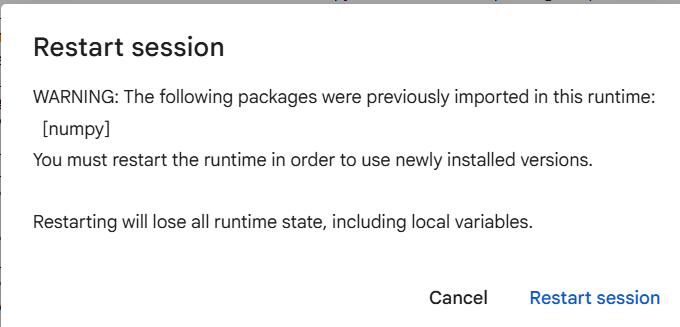

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz (119.8 MB)
  Preparing metadata (setup.py) ... done


**C2**

**Loading the bc5cdr model after successful installation**

In [ ]:
import spacy
sci_nlp = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.12/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


**C3**

**In the subsequent code cells, our aim is checking the pipe names, labels before running the first test case**

In [ ]:
sci_nlp.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

**C4**

In [ ]:
sci_nlp.get_pipe('ner').labels

('CHEMICAL', 'DISEASE')

**C5**

**Running the first test case**

In [ ]:
x = input("Enter a sentence: ")
print("x = ",x)

Enter a sentence: i have pain in my leg
x =  i have pain in my leg


**C6**

**This code cell shows the entites detected from the text entered in the cell C5**

In [ ]:
docx = sci_nlp(x)
print("No of entities detected: ", len(docx.ents))
for ent in docx.ents:
    print(ent.text, ent.label_)

No of entities detected:  1
pain DISEASE


**C7**

**Checking another Biomedical Model en_ner_craft_md, starting with its installation**

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_craft_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_ner_craft_md: filename=en_ner_craft_md-0.5.4-py3-none-any.whl size=119808221 sha256=73e8e3c72f947c6c2341a81567fc5d686dc7afa46d73cea20d721c82ea8def44
  Stored in directory: /root/.cache/pip/wheels/c0/97/b6/8430d83b1b4ac1312cc804510a503eeb4e4067d2af846ca50d
Successfully built en_ner_craft_md


**C8**

**Loading the model**

In [ ]:
sci_craft_nlp = spacy.load("en_ner_craft_md")

**C9**

**In the subsequent code cells, our aim is checking the pipe names, labels before running the first test case**

In [ ]:
sci_craft_nlp.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

**C10**

**[We see that the labels provided by this model is not very comprehendable to us which makes us move on to the other models]**

In [ ]:
sci_craft_nlp.get_pipe('ner').labels

('CHEBI', 'CL', 'GGP', 'GO', 'SO', 'TAXON')

**C11**

**Checking another Biomedical Model en_ner_sci_sm, starting with its installation**

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.5.4-py3-none-any.whl size=14778488 sha256=d09e4f15093c35cd0815d4bfa8a5213f357d05a16500ebccdfabc8ee7387f4d9
  Stored in directory: /root/.cache/pip/wheels/49/7f/0f/ec0fc3a935bfe55e6ef2ca04b7a31e33cbd533a6d7cbd9e11e
Successfully built en_core_sci_sm


**C12**

**Loading the model**

In [ ]:
sci_sm_nlp = spacy.load("en_core_sci_sm")

**C13**

**Checking the pipe names and labels provided by this model before running the first test case**

In [ ]:
sci_sm_nlp.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

**C14**

In [ ]:
sci_sm_nlp.get_pipe('ner').labels

('ENTITY',)

**C15**

**Running the first test case and checking its performance**

In [ ]:
x = input("Enter a sentence: ")
print("x = ",x)

Enter a sentence: i am having diabetes
x =  i am having diabetes


**C16**

**[Disease Entity Detected Successfully]**

In [ ]:
docx = sci_sm_nlp(x)
print("No of entities detected: ", len(docx.ents))
for ent in docx.ents:
    print(ent.text, ent.label_)

No of entities detected:  1
diabetes ENTITY


**C17**

**Now, we find 2 contenders for the final model selection, bc5cdr and the en_ner_sci_sm model, with the latter already having an advantage of small size being a small (sm) model. [Actual Size can be found from the original documentation (link shared at the top of the notebook]**

**We test it on a list of sentences (where each is an intelligent spam trying to confuse models) spam_sentences**

In [ ]:
spam_sentences = [
    "Give me pain relief now",
    "you gave me head ache yesterday",
    "my leg pain is your fault",
    "fix my stomach ache immediately",
    "I have back pain because of you",
    "chest pain from your bad service",
    "headache caused by this app",
    "leg cramp needs urgent fix",
    "tooth pain from your delay",
    "fever because you ignored me",
    "buy viagra for my pain",
    "pain killers where are they",
    "morphine for my headache now",
    "give me codeine tablets fast",
    "ibuprofen for leg pain stat",
    "paracetamol for fever urgently",
    "aspirin for my chest pain",
    "xanax for anxiety pain",
    "oxycontin for back ache",
    "vicodin for tooth pain",
    "my headache is killing me lol",
    "leg pain makes me angry",
    "stomach ache from bad food",
    "fever and chills attack me",
    "back pain ruins my day",
    "chest pain when breathing",
    "headache every morning now",
    "knee pain walking stairs",
    "elbow pain lifting weights",
    "wrist pain typing emails",
    "neck pain from phone use",
    "shoulder pain sleeping wrong",
    "sciatica pain down my leg",
    "migraine pain behind eyes",
    "cluster headache pain hell",
    "neuropathy pain in feet",
    "arthritis pain in fingers",
    "gout pain in big toe",
    "shingles pain on skin",
    "kidney stone pain waves",
    "gallstone pain after meals",
    "appendicitis pain right side",
    "diverticulitis pain left side",
    "ovarian cyst pain pelvis",
    "endometriosis pain monthly",
    "fibromyalgia pain everywhere",
    "chronic fatigue pain body",
    "lupus pain joints swelling",
    "ms pain nerve damage",
    "parkinsons pain muscle cramps"
]


**C18**

In [ ]:
count = 0
caught_by_bc5cdr=0
caught_senteces_by_bc5cdr=[]
for sentence in spam_sentences:
    docx1 = sci_nlp(sentence)
    if len(docx1.ents)>0:
        count+=1
    else:
        caught_by_bc5cdr+=1
        caught_senteces_by_bc5cdr.append(sentence)
print("No. of sentences bc5cdr is failing to filter:",count)
print("No. of sentences bc5cdr is catching:",caught_by_bc5cdr)
print("Sentences bc5cdr is catching: ", caught_senteces_by_bc5cdr)

No. of sentences bc5cdr is failing to filter: 49
No. of sentences bc5cdr is catching: 1
Sentences bc5cdr is catching:  ['chronic fatigue pain body']


**C19**

In [ ]:
count = 0
caught_by_sm=0
caught_senteces_by_sm=[]
for sentence in spam_sentences:
    docx2 = sci_sm_nlp(sentence)
    if len(docx2.ents)>0:
        count+=1
    else:
        caught_by_sm+=1
        caught_senteces_by_sm.append(sentence)
print("No. of sentences sm is failing to filter:",count)
print("No. of sentences sm is catching:",caught_by_sm)
print("Sentences sm is catching: ", caught_senteces_by_sm)

No. of sentences sm is failing to filter: 49
No. of sentences sm is catching: 1
Sentences sm is catching:  ['shoulder pain sleeping wrong']


**C20**

**Unfortunately, we find both the models pretty weak in filtering intelligent spam sentences.**

**The reason is pretty intuitive, since the ner models basically work on keyword matching rather then grabbing the semantic sense of the sentences.**

**Which leaves behind a good opportunity of improvement in the future, but for the time being we move forward to testing which model is better in filtering a wide range of spam sentences.**

In [ ]:
spam_categories = {
    "FAKE_COMPLAINTS": [
        "this app gave me headache",
        "your service caused my back pain",
        "I got fever from waiting",
        "stomach ache because of you",
        "leg pain from your delay",
        "chest pain from frustration",
        "neck pain typing complaints",
        "eye strain from your UI",
        "migraine from bad design",
        "your bugs gave me stress pain",
        "hand cramps clicking buttons",
        "finger pain scrolling feed",
        "wrist pain from mouse",
        "elbow pain from armrest",
        "shoulder tension from anger",
        "jaw pain clenching teeth",
        "toothache from grinding",
        "ear pain from loud music",
        "sinus pain from allergies",
        "throat pain yelling at screen"
    ],

    "DRUG_DEMANDS": [
        "need painkillers urgently",
        "where are the opioids",
        "send morphine tablets",
        "oxycontin for my pain",
        "vicodin prescription now",
        "codeine syrup fast",
        "fentanyl patches please",
        "hydrocodone tablets",
        "tramadol for back pain",
        "percocet for headache",
        "demerol injection stat",
        "dilaudid for cramps",
        "methadone maintenance",
        "buprenorphine strips",
        "suboxone for withdrawal",
        "xanax for anxiety pain",
        "ativan for muscle spasm",
        "valium for tension",
        "klonopin for seizures",
        "gabapentin for neuropathy"
    ],

    "NON_MEDICAL_PRAISE": [
        "I love this app so much",
        "great service thank you",
        "best app ever made",
        "5 star rating deserved",
        "highly recommend to friends",
        "my favorite application",
        "perfect user experience",
        "flawless performance",
        "lightning fast response",
        "beautiful dark theme",
        "golden tabs are cool",
        "love the video cards",
        "gps feature works great",
        "clinics tab perfect",
        "cache works instantly",
        "no bugs found yet",
        "team did amazing work",
        "professional quality app",
        "enterprise level code",
        "production ready system"
    ],

    "SENTIMENT_TRICKS": [
        "this makes me so happy",
        "feeling wonderful today",
        "everything is perfect",
        "no complaints at all",
        "pure joy using this",
        "blissful user experience",
        "ecstatic about features",
        "delighted with results",
        "thrilled by speed",
        "overjoyed with design"
    ],

    "CASUAL_TALK": [
        "what's up everyone",
        "how you doing today",
        "nice weather outside",
        "watching cricket match",
        "cooking dinner now",
        "going for walk soon",
        "family time tonight",
        "movie night planned",
        "weekend coming soon",
        "monday blues ahead"
    ]
}



**C21**

In [ ]:
# Category-wise spam detection analysis
categories = spam_categories  # Your dict from previous message

print("=== BC5CDR ANALYSIS ===")
for cat_name, sentences in categories.items():
    bc5cdr_uncaught = 0
    for sentence in sentences:
        doc = sci_nlp(sentence)  # bc5cdr
        if len(doc.ents) > 0:
            bc5cdr_uncaught += 1
    total = len(sentences)
    print(f"Spams caught by bc5cdr in {cat_name}: {total-bc5cdr_uncaught}/{total} ({(total-bc5cdr_uncaught)/total*100:.1f}%)")

print("\n=== SCI_SM ANALYSIS ===")
for cat_name, sentences in categories.items():
    sm_uncaught = 0
    for sentence in sentences:
        doc = sci_sm_nlp(sentence)  # en_core_sci_sm
        if len(doc.ents) > 0:
            sm_uncaught += 1
    total = len(sentences)
    print(f"Spams caught by sm in {cat_name}: {total-sm_uncaught}/{total} ({(total-sm_uncaught)/total*100:.1f}%)")

=== BC5CDR ANALYSIS ===
Spams caught by bc5cdr in FAKE_COMPLAINTS: 3/20 (15.0%)
Spams caught by bc5cdr in DRUG_DEMANDS: 3/20 (15.0%)
Spams caught by bc5cdr in NON_MEDICAL_PRAISE: 20/20 (100.0%)
Spams caught by bc5cdr in SENTIMENT_TRICKS: 10/10 (100.0%)
Spams caught by bc5cdr in CASUAL_TALK: 10/10 (100.0%)

=== SCI_SM ANALYSIS ===
Spams caught by sm in FAKE_COMPLAINTS: 0/20 (0.0%)
Spams caught by sm in DRUG_DEMANDS: 0/20 (0.0%)
Spams caught by sm in NON_MEDICAL_PRAISE: 3/20 (15.0%)
Spams caught by sm in SENTIMENT_TRICKS: 3/10 (30.0%)
Spams caught by sm in CASUAL_TALK: 1/10 (10.0%)


**Therefore, we find the above results, which we can see very much tilting towards the bc5cdr model in terms of spam filtering.**

### Conclusion Notes

**Therefore we select the bc5cdr model for our spam filtering operation in our Medication Recommender System Info-Health**